In [9]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import cdt
from cdt.causality.graph import PC
import networkx as nx

import utils.graph_utils
import utils.globals as uglobals

import os

In [28]:
def json_to_df(data):
    out = {}
    
    for model_idx, (model, results) in enumerate(data.items()):
        # out['model'].append(model_idx)
        # out['model'].append(model)
        for subject, score in results.items():
            print(subject)
            if subject not in out.keys():
                out[subject] = []
            out[subject].append(float(score))
            
    out = pd.DataFrame(out)
    return out

def make_graph(node_list):
    g = nx.DiGraph()
    
    for s in node_list:
        for e in node_list:
            if e == 'n_params':
                continue
            g.add_edges_from([(s, e)])
    
    return g


def run_pc(exp_name, alpha=0.15):
    with open(f'{uglobals.AGGREGATED_OUTPUT_DIR}/{exp_name}.json') as f:
        data = json.load(f)

    df = json_to_df(data)
    
    obj = PC(alpha=alpha, method_indep='hsic_perm')
    out = obj.predict(df_data=df)

    return out


In [29]:
# Draw overall output
name = 'aggregated_5shot_spec_full'
out = run_pc(name)

nx.draw_networkx(out, node_size=10, font_size=4)
plt.savefig(f'{uglobals.FIGS_DIR}/{name}', dpi=1000)
plt.show()
print(out.edges)
print(len(out.edges))

../results/aggregated/aggregated_5shot_spec_full.json
abstract_algebra
anatomy
astronomy
business_ethics
clinical_knowledge
college_biology
college_chemistry
college_computer_science
college_mathematics
college_medicine
college_physics
computer_security
conceptual_physics
econometrics
electrical_engineering
elementary_mathematics
formal_logic
global_facts
high_school_biology
high_school_chemistry
high_school_computer_science
high_school_geography
high_school_government_and_politics
high_school_macroeconomics
high_school_mathematics
high_school_microeconomics
high_school_physics
high_school_psychology
high_school_statistics
human_aging
human_sexuality
international_law
jurisprudence
logical_fallacies
machine_learning
management
marketing
medical_genetics
miscellaneous
moral_disputes
moral_scenarios
nutrition
philosophy
prehistory
professional_accounting
professional_psychology
public_relations
sociology
us_foreign_policy
virology
world_religions
abstract_algebra
anatomy
astronomy
busine

AttributeError: 'NoneType' object has no attribute 'to_csv'

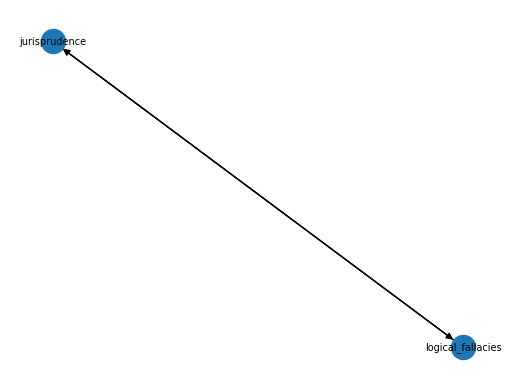

In [7]:
# Draw Cliques
out_copy = out.copy()
out_copy.remove_nodes_from(list(nx.isolates(out_copy)))

idx = 0
while len(out_copy.nodes) > 0:

    for node in out_copy.nodes:
        cur_node = node
        cur_clique = [node]
        break

    for node in out_copy.nodes:
        if node in nx.descendants(out_copy, cur_node) or cur_node in nx.descendants(out_copy, node):
            cur_clique.append(node)

    out_copy_copy = out_copy.copy()

    out_copy.remove_nodes_from(cur_clique)
    out_copy_copy.remove_nodes_from(out_copy.nodes)

    plt.cla()
    nx.draw_networkx(out_copy_copy, font_size=7)
    plt.box(False)
    plt.savefig(f'{uglobals.FIGS_DIR}/{name}_clique_{idx}', dpi=1000)
    idx += 1


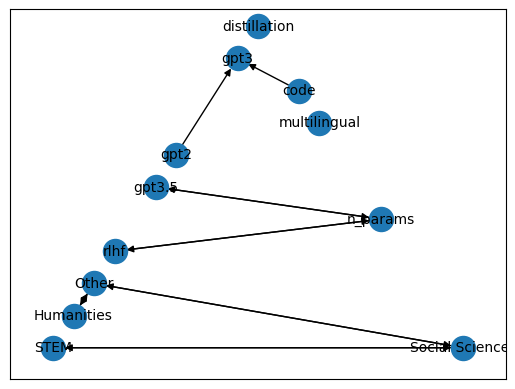

[('STEM', 'Social Sciences'), ('Other', 'Social Sciences'), ('Other', 'Humanities'), ('Social Sciences', 'STEM'), ('Social Sciences', 'Other'), ('Humanities', 'Other'), ('n_params', 'rlhf'), ('n_params', 'gpt3.5'), ('code', 'gpt3'), ('rlhf', 'n_params'), ('gpt2', 'gpt3'), ('gpt3.5', 'n_params')]
12


In [8]:
# Draw grouped output
name = 'aggregated_5shot_grouped_spec_full'
out = run_pc(name)

nx.draw_networkx(out, font_size=10, pos=(nx.drawing.layout.planar_layout(out)))
plt.savefig(f'{uglobals.FIGS_DIR}/{name}', dpi=1000)
plt.show()
print(out.edges)
print(len(out))

In [2]:
pc = PC()
pc.dir_CI_test 

{'binary': 'pcalg::binCItest',
 'discrete': 'pcalg::disCItest',
 'hsic_gamma': 'kpcalg::kernelCItest',
 'hsic_perm': 'kpcalg::kernelCItest',
 'hsic_clust': 'kpcalg::kernelCItest',
 'gaussian': 'pcalg::gaussCItest',
 'rcit': 'RCIT:::CItest',
 'rcot': 'RCIT:::CItest'}